In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats

In [4]:
species_sample_one = pd.read_csv('/data/passala/Collaborator_Data/Zach_Pan_solanum_Data/Initial_species_bulk_seq/Solanum_muricatum/haplotype_2/STAR_out_Smur2hap2-apices-1/ReadsPerGene.out.tab', sep = '\t', names = ['Gene','Count'], usecols = [0,1], skiprows=4)
species_sample_two = pd.read_csv('/data/passala/Collaborator_Data/Zach_Pan_solanum_Data/Initial_species_bulk_seq/Solanum_muricatum/haplotype_2/STAR_out_Smur2hap2-apices-3/ReadsPerGene.out.tab', sep = '\t', names = ['Gene','Count'], usecols = [0,1], skiprows=4)


In [5]:
species_sample_one

,Gene,Count
0,Solmur2hap2.Cg000010,1
1,Solmur2hap2.Cg000020,0
2,Solmur2hap2.Cg000030,10
3,Solmur2hap2.Cg000040,0
4,Solmur2hap2.Cg000050,0
...,...,...
36892,Solmur2hap2.ctg00000092g000280,0
36893,Solmur2hap2.ctg00000092g000290,0
36894,Solmur2hap2.ctg00000092g000300,0
36895,Solmur2hap2.ctg00000092g000310,0


In [6]:
species_sample_two

,Gene,Count
0,Solmur2hap2.Cg000010,0
1,Solmur2hap2.Cg000020,0
2,Solmur2hap2.Cg000030,11
3,Solmur2hap2.Cg000040,0
4,Solmur2hap2.Cg000050,0
...,...,...
36892,Solmur2hap2.ctg00000092g000280,0
36893,Solmur2hap2.ctg00000092g000290,0
36894,Solmur2hap2.ctg00000092g000300,0
36895,Solmur2hap2.ctg00000092g000310,0


In [7]:
combined_sample = pd.concat([species_sample_one['Gene'],species_sample_one['Count'],species_sample_two['Count']], axis = 1)
combined_sample

,Gene,Count,Count
0,Solmur2hap2.Cg000010,1,0
1,Solmur2hap2.Cg000020,0,0
2,Solmur2hap2.Cg000030,10,11
3,Solmur2hap2.Cg000040,0,0
4,Solmur2hap2.Cg000050,0,0
...,...,...,...
36892,Solmur2hap2.ctg00000092g000280,0,0
36893,Solmur2hap2.ctg00000092g000290,0,0
36894,Solmur2hap2.ctg00000092g000300,0,0
36895,Solmur2hap2.ctg00000092g000310,0,0


In [8]:
combined_sample.columns = ['FEATURE_ID','Rep 1','Rep 2']
combined_sample = combined_sample.set_index('FEATURE_ID')

In [9]:
combined_sample.head(10)

,Rep 1,Rep 2
FEATURE_ID,,
Solmur2hap2.Cg000010,1,0
Solmur2hap2.Cg000020,0,0
Solmur2hap2.Cg000030,10,11
Solmur2hap2.Cg000040,0,0
Solmur2hap2.Cg000050,0,0
Solmur2hap2.Cg000060,3,2
Solmur2hap2.Cg000070,0,1
ncRNA_Solmur2hap2.Cg005691,0,0
Solmur2hap2.Cg000080,0,0


In [10]:
##combined_sample.to_csv('/data/passala/Collaborator_Data/Zach_Pan_solanum_Data/Initial_species_bulk_seq/Solanum_muricatum/haplotype_2/combined_samples_for_normalizaton.tsv' , sep = '\t')


In [11]:
normalized_combined_sample = pd.read_csv('/data/passala/Collaborator_Data/Zach_Pan_solanum_Data/Initial_species_bulk_seq/Solanum_muricatum/haplotype_2/fpkm_normalized_combined_samples.tsv', sep = '\t', index_col= 0)


In [12]:
normalized_combined_sample

,Rep 1,Rep 2
FEATURE_ID,,
Solmur2hap2.Cg000010,0.027728,0.000000
Solmur2hap2.Cg000020,0.000000,0.000000
Solmur2hap2.Cg000030,0.237092,0.247302
Solmur2hap2.Cg000040,0.000000,0.000000
Solmur2hap2.Cg000050,0.000000,0.000000
...,...,...
Solmur2hap2.ctg00000092g000280,0.000000,0.000000
Solmur2hap2.ctg00000092g000290,0.000000,0.000000
Solmur2hap2.ctg00000092g000300,0.000000,0.000000


In [13]:
scipy.stats.spearmanr(normalized_combined_sample['Rep 1'], normalized_combined_sample['Rep 2'])


SpearmanrResult(correlation=0.9611522426156096, pvalue=0.0)

(array([   0.,  200.,  400.,  600.,  800., 1000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

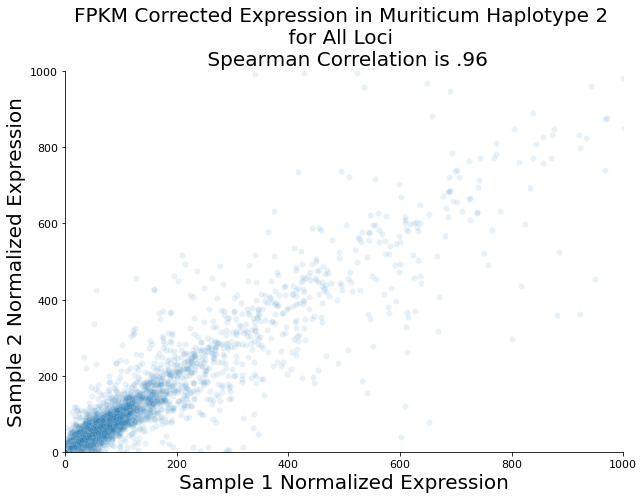

In [16]:
fig, ax = plt.subplots(figsize = (10,7))
fig.patch.set_facecolor('white')
ax = sns.scatterplot(data = normalized_combined_sample, x = 'Rep 1', y = 'Rep 2', alpha = .1, edgecolors = 'none')
plt.ylabel("Sample 2 Normalized Expression", fontsize = 20)
plt.xlabel("Sample 1 Normalized Expression", fontsize = 20)
plt.xlim((0,1000))
plt.ylim((0,1000))
sns.despine()

ax.spines["bottom"].set_color("black")
ax.spines["left"].set_color("black")
plt.title("FPKM Corrected Expression in Muriticum Haplotype 2 \n for All Loci  \n Spearman Correlation is .96", fontsize = 20)
plt.xticks(fontsize = 11)
plt.yticks(fontsize = 11)